# StayWithMe | Churn Prediction
### Lorenzo Meloncelli - Valerio Schettini - Jany Khan Gony - Carlo Ardito



### Introduction.
StayWithMe (SWM) Bank is very worried about some of its customers leaving their credit card service.
They hired you to predict who is going to leave, as this is information could be very valuable to offer better services and conditions to customers that are thinking to leave the bank.

### Dataset.
The dataset is available on https://www.dropbox.com/s/7nwimmta836si5f/churn.csv?dl=0.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset and remove the unnecessary variables

In [16]:
data = pd.read_csv("churn.csv")
data = data.drop(data.columns[0:2], axis = 1)

In [17]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00


Check for missing values

In [18]:
data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

Check for the balance of our data. What portion of our observations refers to a customer that has abandoned the service? 
What portion doesn't?

([<matplotlib.patches.Wedge at 0x7fe532946250>,
 [Text(0.962837119553905, 0.5319254470404094, 'Attrited Customer'),
  Text(-0.9628370946526768, -0.5319254921140673, 'Existing Customer')],
 [Text(0.525183883393039, 0.29014115293113235, '16%'),
  Text(-0.5251838698105509, -0.2901411775167639, '84%')])

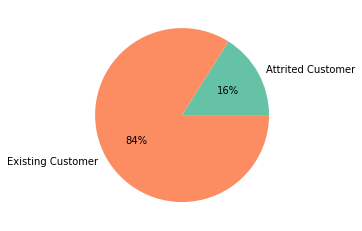

In [19]:
df_pie = data.groupby("Attrition_Flag").size().to_frame(' ')
plt.pie([1627, 8500], labels = ['Attrited Customer', 'Existing Customer'], colors = sns.color_palette('Set2', 2), autopct='%.0f%%')

Same concept as above, visualized through a barplot.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


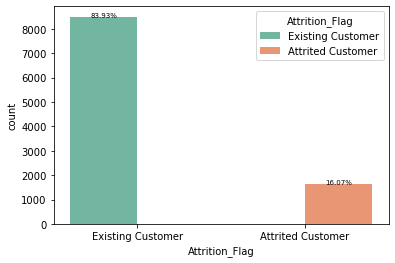

In [7]:
df_plt = data[data['Attrition_Flag'].isin(['Attrited Customer', 'Existing Customer']) ]
ax = sns.countplot(data = df_plt, x = "Attrition_Flag", hue="Attrition_Flag", palette="Set2")
n_records = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1, '{:1.2%}'.format(height/n_records), ha="center", fontsize =7)
 

A deeper dive into the divison between churn and non churn customer according to the value of the total_relationship_count variable. In the following plot are shown the absolute number of customer belonging to each category rather than the corresponding percentage.

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

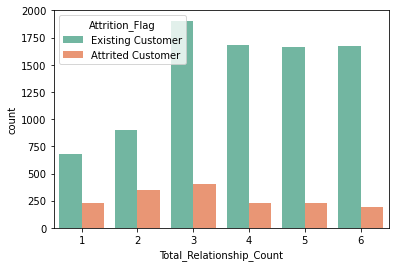

In [8]:
data["Total_Relationship_Count"].value_counts()
df_plt3 = data[data['Total_Relationship_Count'].isin([1,2,3,4,5,6])]
sns.countplot(data = df_plt3, x = "Total_Relationship_Count", hue="Attrition_Flag", palette="Set2")  

Same as above but with respect to the number of times the customer has been contacted in the last 12 months

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

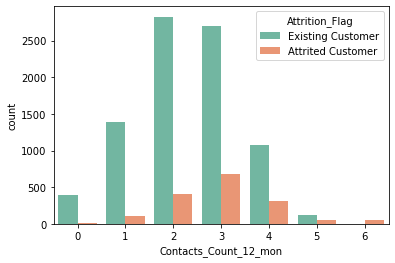

In [9]:
data["Contacts_Count_12_mon"].value_counts()
df_plt4 = data[data['Contacts_Count_12_mon'].isin([0,1,2,3,4,5,6])]
sns.countplot(data = df_plt4, x = "Contacts_Count_12_mon", hue="Attrition_Flag", palette="Set2")  

And for card category

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

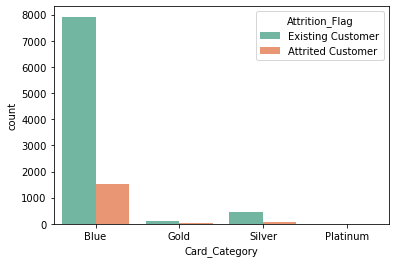

In [10]:
data["Card_Category"].value_counts()
df_plt5 = data[data['Card_Category'].isin(["Blue", "Silver", "Gold", "Platinum"])]
sns.countplot(data = df_plt4, x = "Card_Category", hue="Attrition_Flag", palette="Set2")  


Total transaction amount

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

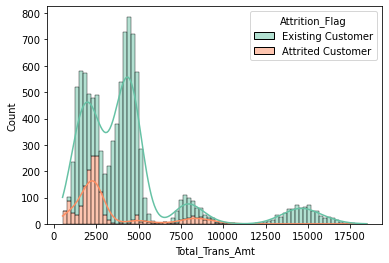

In [11]:
sns.histplot(data = data, x = "Total_Trans_Amt", hue = 'Attrition_Flag', multiple="stack", palette="Set2", kde=True) 


Average utilization ratio

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

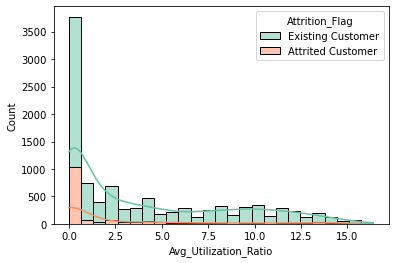

In [12]:
sns.histplot(data = data, x = "Avg_Utilization_Ratio", hue = 'Attrition_Flag', multiple="stack", palette="Set2", kde=True) 


Lastly, credit limit

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

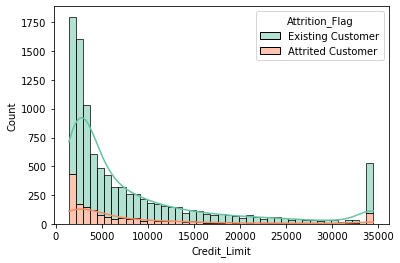

In [13]:
sns.histplot(data = data, x = "Credit_Limit", hue = 'Attrition_Flag', multiple="stack", palette="Set2", kde=True) 

Some further transformations are needed to transform categorical variables. In the following code we transform then into dummy variables
and replace the attrition_flag with a 1 for churn and 0 for non-churn.

In [20]:
data = pd.get_dummies(data, columns = ['Education_Level', 'Gender', 'Marital_Status', 'Income_Category', 'Card_Category'])

replace = {'Existing Customer' : 0, 'Attrited Customer' : 1}
data = data.replace(replace)

Finally, we replace outliers with the respective median.

In [21]:
cols = data.columns 

Q1 = data[cols].quantile(0.10)
Q3 = data[cols].quantile(0.90)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Mean analysis
For better visualization, create subsets made from variables whose values fall within a similar range


<AxesSubplot:ylabel='variables'>

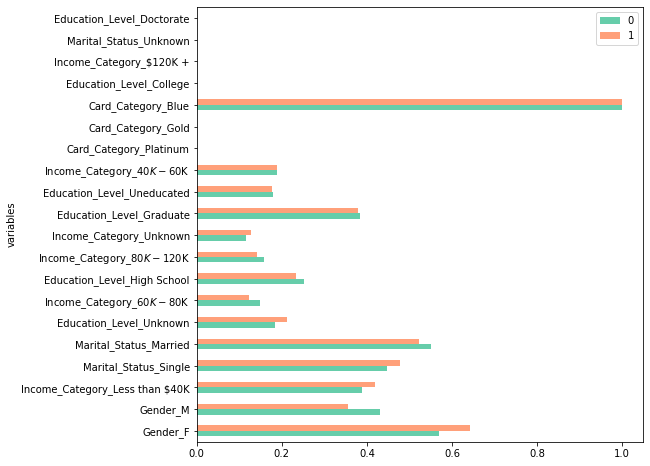

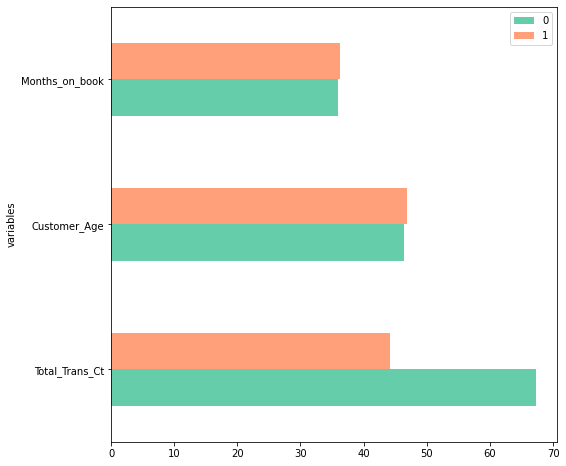

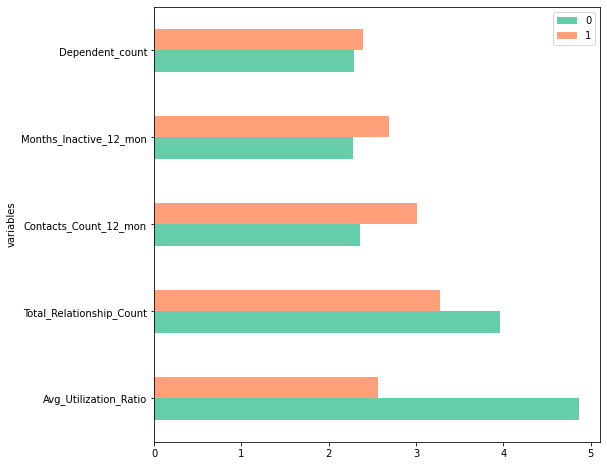

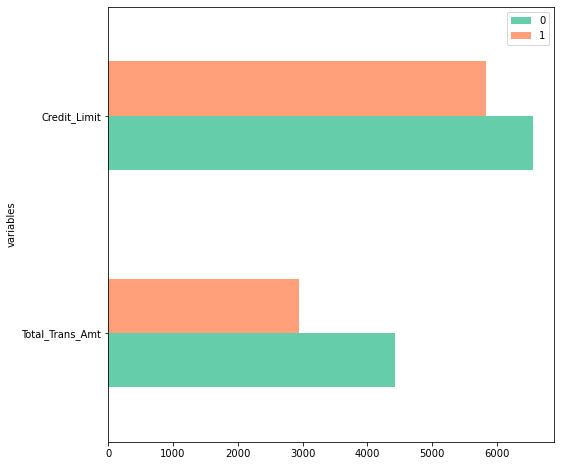

In [29]:
avg_df_1 = data.filter(['Attrition_Flag', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown', 'Gender_F',
       'Gender_M', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'], axis=1)

avg_df_2 = data.filter(['Attrition_Flag', 'Customer_Age', 'Months_on_book', 'Total_Trans_Ct'], axis=1)
avg_df_3 = data.filter(['Attrition_Flag', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                            'Contacts_Count_12_mon', 'Avg_Utilization_Ratio'], axis=1)
avg_df_4 = data.filter(['Attrition_Flag', 'Credit_Limit', 'Total_Trans_Amt'], axis=1)


# Group the dataset into those who have the attrition flag and those who don't. 
# For both groups compute the average value of each of the features present in the dataset.
avg_df_1 = avg_df_1.groupby('Attrition_Flag').mean() 
avg_df_1.reset_index(drop=True, inplace=True)
columns = list(avg_df_1.columns)
avg_df_1 = avg_df_1.T
avg_df_1["variables"] = columns
avg_df_1["difference"] = abs(avg_df_1[0] - avg_df_1[1])
sort_df_1 = avg_df_1.sort_values(by=['difference'], ascending=False) 
# Sort the results in descending order on the basis of the difference between the means of the two groups.
difference_dataset_1 = sort_df_1.head(20)
difference_dataset_1.plot(x="variables", y=[0, 1], kind="barh", color = ["mediumaquamarine", "lightsalmon"], figsize = (8,8))

avg_df_2 = avg_df_2.groupby('Attrition_Flag').mean()
avg_df_2.reset_index(drop=True, inplace=True)
columns = list(avg_df_2.columns)
avg_df_2 = avg_df_2.T
avg_df_2["variables"] = columns
avg_df_2["difference"] = abs(avg_df_2[0] - avg_df_2[1])
sort_df_2 = avg_df_2.sort_values(by=['difference'], ascending=False)
difference_dataset_2 = sort_df_2.head(20)
difference_dataset_2.plot(x="variables", y=[0, 1], kind="barh", color = ["mediumaquamarine", "lightsalmon"], figsize = (8,8))

avg_df_3 = avg_df_3.groupby('Attrition_Flag').mean()
avg_df_3.reset_index(drop=True, inplace=True)
columns = list(avg_df_3.columns)
avg_df_3 = avg_df_3.T
avg_df_3["variables"] = columns
avg_df_3["difference"] = abs(avg_df_3[0] - avg_df_3[1])
sort_df_3 = avg_df_3.sort_values(by=['difference'], ascending=False)
difference_dataset_3 = sort_df_3.head(20)
difference_dataset_3.plot(x="variables", y=[0, 1], kind="barh", color = ["mediumaquamarine", "lightsalmon"], figsize = (8,8))

avg_df_4 = avg_df_4.groupby('Attrition_Flag').mean()
avg_df_4.reset_index(drop=True, inplace=True)
columns = list(avg_df_4.columns)
avg_df_4 = avg_df_4.T
avg_df_4["variables"] = columns
avg_df_4["difference"] = abs(avg_df_4[0] - avg_df_4[1])
sort_df_4 = avg_df_4.sort_values(by=['difference'], ascending=False)
difference_dataset_4 = sort_df_4.head(20)
difference_dataset_4.plot(x="variables", y=[0, 1], kind="barh", color = ["mediumaquamarine", "lightsalmon"], figsize = (8,8))


## Analysis of the correlations

Exploring the correlation between all the variables in our dataset by visualizing them through a heatmap of the correlation matrix.

<ipython-input-17-9ca086cc5dae>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape),k=1).astype(np.bool))


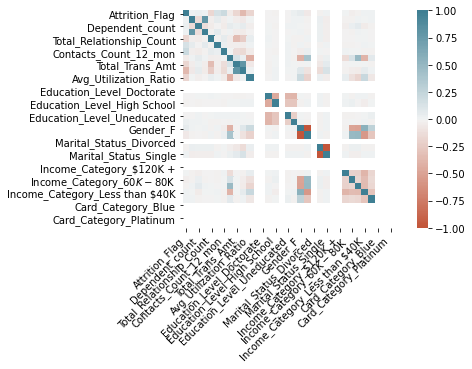

In [17]:
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

abs_corr = data.corr().abs()
upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data = data.drop(to_drop, axis=1)

## Undersampling

Randomly select observation from the majority class and delete them 

In [35]:
import random
class_2, class_1 = data.Attrition_Flag.value_counts() 
c2 = data[data['Attrition_Flag'] == 0]
c1 = data[data['Attrition_Flag'] == 1]
random.seed(42)
df_2 = c2.sample(class_1) 
under_data = pd.concat([df_2,c1],axis=0)
under_data.Attrition_Flag.value_counts()

under_data['Attrition_Flag'].value_counts()

0    937
1    937
Name: Attrition_Flag, dtype: int64

## Train/test split

In [36]:
from numpy.random import default_rng
rng = default_rng(2022) 
train = rng.choice(int(under_data.shape[0]), size=int(round(under_data.shape[0]*0.8)), replace=False)
test = [i for i in range(under_data.shape[0]) if i not in train]
train_y, train_X = under_data.iloc[train, 0].values, under_data.iloc[train, 1:].values
test_y, test_X = under_data.iloc[test, 0].values, under_data.iloc[test, 1:].values
print(train_y.shape, train_X.shape, test_y.shape, test_X.shape)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

(1499,) (1499, 33) (375,) (375, 33)


## KNN

Implement a K-Nearest Neighbor Classifier. Ise a for loop to check for the number of neighbors that maximizes the accuracy of the model. Print the result for each cycle, and finally plot the accuracy metric change according to the number of neighbor chosen to train the model at each step.

Test Accuracy:  0.688 with 1 neighbros 
 ------------------
Test Accuracy:  0.7386666666666667 with 3 neighbros 
 ------------------
Test Accuracy:  0.7546666666666667 with 5 neighbros 
 ------------------
Test Accuracy:  0.7493333333333333 with 7 neighbros 
 ------------------
Test Accuracy:  0.7333333333333333 with 9 neighbros 
 ------------------
Test Accuracy:  0.7386666666666667 with 11 neighbros 
 ------------------
Test Accuracy:  0.744 with 13 neighbros 
 ------------------
Test Accuracy:  0.744 with 15 neighbros 
 ------------------
Test Accuracy:  0.7413333333333333 with 17 neighbros 
 ------------------
Test Accuracy:  0.7466666666666667 with 19 neighbros 
 ------------------
Test Accuracy:  0.736 with 21 neighbros 
 ------------------
Test Accuracy:  0.7386666666666667 with 23 neighbros 
 ------------------
Test Accuracy:  0.768 with 25 neighbros 
 ------------------
Test Accuracy:  0.7653333333333333 with 27 neighbros 
 ------------------
Test Accuracy:  0.7653333333333333

Text(0, 0.5, 'Accuracy')

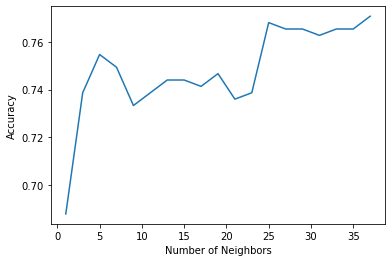

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

l = range(int(round(np.sqrt(len(train_y)))))
n = [i for i in l if i%2 != 0]
n_accuracy = []
for neighbors in n:
    clf = KNeighborsClassifier(n_neighbors = neighbors)
    clf.fit(train_X, train_y)
    predicted_churn = clf.predict(test_X)
    n_accuracy.append(np.sum(predicted_churn == test_y) / len(test_y))
    print("Test Accuracy: " , np.sum(predicted_churn == test_y) / len(test_y), 'with',neighbors, 'neighbros',
          '\n ------------------')
sns.lineplot(x = n, y = n_accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')    

Get the k-value that maximizes acuracy

In [22]:
total = dict(zip(n,n_accuracy))
arg_max = [i for i in range(len(n_accuracy)) if n_accuracy[i] == np.max(n_accuracy)]
print('Number of neighbors that maximizes test accuracy:', n[arg_max[0]])

Number of neighbors that maximizes test accuracy: 37


Implement the best model, print the relative metrics, and show them in a heatmap of the relative confusion matrix. The most important metrics for us are precision and recall.

In [23]:
knn_model = KNeighborsClassifier(n_neighbors = n[arg_max[0]])
knn_model.fit(train_X, train_y)
predicted_churn = clf.predict(test_X)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_train = knn_model.score(train_X, train_y)
print("KNN - Accuracy on the training set: " + str(accuracy_train))
print("KNN - Accuracy on the test set: " + str(accuracy_score(test_y, predicted_churn)))
print("KNN - Precision: " + str(precision_score(test_y, predicted_churn)))
print("KNN - Recall: " + str(recall_score(test_y, predicted_churn)))

KNN - Accuracy on the training set: 0.7865243495663776
KNN - Accuracy on the test set: 0.7706666666666667
KNN - Precision: 0.7272727272727273
KNN - Recall: 0.8397790055248618


Text(91.68, 0.5, 'predicted label')

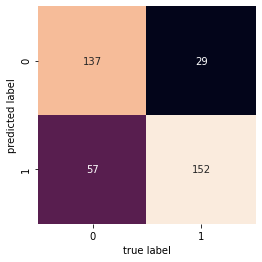

In [24]:
mat = confusion_matrix(test_y, predicted_churn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Produce also the probabilities for the classification of the observations into each of the two categories.

In [25]:
from sklearn.calibration import CalibratedClassifierCV
# fit and calibrate model on training data
clf_knn = CalibratedClassifierCV(knn_model, cv=3, method='sigmoid')  
clf_knn.fit(train_X, train_y)
# evaluate the model
y_proba_knn = clf_knn.predict_proba(test_X)
y_proba_knn = pd.DataFrame(y_proba_knn)
y_proba_knn.head()

#y_proba_knn['KNN PREDICTION'] = np.where(y_proba_knn[0] >= 0.5, 0, 1)

,0,1
0,0.701041,0.298959
1,0.898841,0.101159
2,0.551872,0.448128
3,0.732683,0.267317
4,0.649044,0.350956


## SVC

### Tuning

Implement a grid-search cross-validation to find the best parameters for our support vector classifier. Code is in string format because of the time it takes to run.

In [31]:
'''
modelsvc = SVC()
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
CV_svc= GridSearchCV(estimator=modelsvc, param_grid=param, cv=5)
CV_svc.fit(train_X, train_y)
print(CV_svc.best_params_)


{'C': 1, 'coef0': 0.5, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


### Model

Implement the model with the parameters previously found, print the results and the confusion matrix.

In [26]:
svc_model = SVC(C=1, coef0=0.5, degree=3, gamma='scale', kernel='poly')
svc_model.fit(train_X, train_y)
y_pred_svc = svc_model.predict(test_X)

accuracy_train = svc_model.score(train_X, train_y)
print("SVC - Accuracy on the training set: " + str(accuracy_train))
print("SVC - Accuracy on the test set: " + str(accuracy_score(test_y, y_pred_svc)))
print("SVC - Precision: " + str(precision_score(test_y, y_pred_svc)))
print("SVC - Recall: " + str(recall_score(test_y, y_pred_svc)))

SVC - Accuracy on the training set: 0.9259506337558372
SVC - Accuracy on the test set: 0.856
SVC - Precision: 0.8547486033519553
SVC - Recall: 0.8453038674033149


Text(91.68, 0.5, 'predicted label')

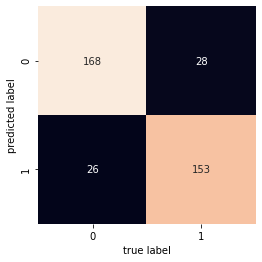

In [27]:
mat = confusion_matrix(test_y, y_pred_svc)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [28]:
from sklearn.calibration import CalibratedClassifierCV
clf_svc = CalibratedClassifierCV(svc_model, cv=3) 
clf_svc.fit(train_X, train_y)
y_proba_svc = clf_svc.predict_proba(test_X)
y_proba_svc = pd.DataFrame(y_proba_svc)
y_proba_svc.head()
#y_proba_svm['SVM PREDICTION'] = np.where(y_proba_svm[0] >= 0.5, 0, 1)

,0,1
0,0.817163,0.182837
1,0.986658,0.013342
2,0.699232,0.300768
3,0.904846,0.095154
4,0.538689,0.461311


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

### Tuning

Perform once again some tuning to adjust the model parameters

In [42]:
'''
rf_final = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf_final, param_grid=param_grid, cv=5)
CV_rfc.fit(train_X, train_y)
print(CV_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 250}


### Model

Impelment the model

In [37]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')
rfc1.fit(train_X, train_y)
y_pred_rf = rfc1.predict(test_X)

rfc1.feature_importances_
sorted_idx = rfc1.feature_importances_.argsort()

Plot an horizontal barplot of the feature's importance in our random forest

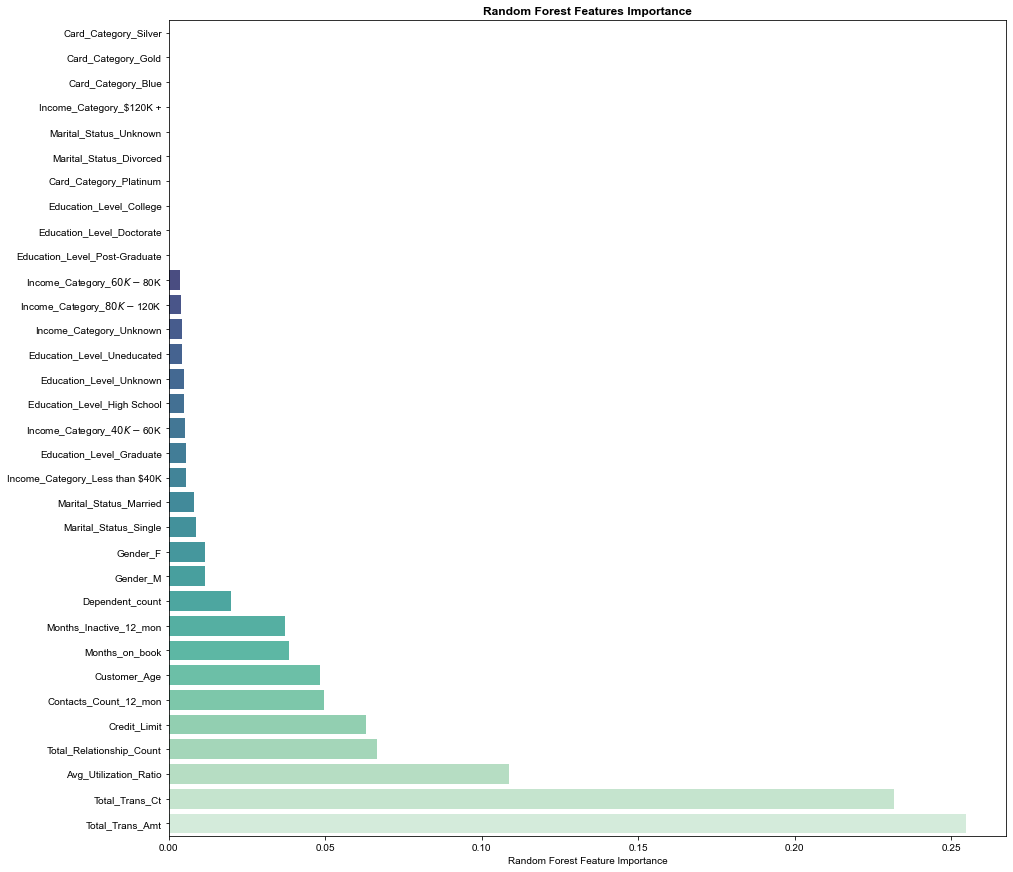

In [39]:
sorted_idx = rfc1.feature_importances_.argsort()
X = under_data.iloc[:, under_data.columns != "Attrition_Flag"].values
yaxis1 = pd.DataFrame(X, columns= ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown', 'Gender_F',
       'Gender_M', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'])

plt.figure(figsize=(15, 15))
sns.barplot(x=rfc1.feature_importances_[sorted_idx], y=yaxis1.columns[sorted_idx], orient="h",
            palette="mako")
plt.xlabel("Random Forest Feature Importance")
plt.title("Random Forest Features Importance", fontweight="bold", fontsize=12)
sns.set(font_scale=0.3)
plt.rcParams['figure.dpi'] = 300
plt.show()

### Accuracy

In [44]:
accuracy_train = rfc1.score(train_X, train_y)
print("Random Forest - Accuracy on the training set: " + str(accuracy_train))
print("Random Forest - Accuracy on the test set: " + str(accuracy_score(test_y, y_pred_rf)))
print("Random Forest - Precision: " + str(precision_score(test_y, y_pred_rf)))
print("Random Forest - Recall: " + str(recall_score(test_y, y_pred_rf)))

Random Forest - Accuracy on the training set: 0.9773182121414277
Random Forest - Accuracy on the test set: 0.9013333333333333
Random Forest - Precision: 0.8789473684210526
Random Forest - Recall: 0.9226519337016574


Text(91.68, 0.5, 'predicted label')

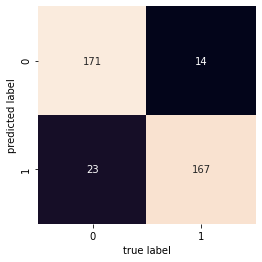

In [45]:
mat = confusion_matrix(test_y, y_pred_rf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [46]:
clf_rf = CalibratedClassifierCV(rfc1, cv=3) 
clf_rf.fit(train_X, train_y)
y_proba_rf = clf_rf.predict_proba(test_X)
y_proba_rf = pd.DataFrame(y_proba_rf)
y_proba_rf.head()
#y_proba_rf['RF PREDICTION'] = np.where(y_proba_rf[0] >= 0.5, 0, 1)

,0,1
0,0.918671,0.081329
1,0.993142,0.006858
2,0.961434,0.038566
3,0.960694,0.039306
4,0.932522,0.067478


## Logistic Regression

Try also with a simple logistic regression model.

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_X, train_y.ravel())
y_pred_log = logreg.predict(test_X)
y_pred_log = pd.DataFrame(y_pred_log)

accuracy_train = logreg.score(train_X, train_y)
print("Accuracy on the training set: " + str(accuracy_train))
print("Logistic Regression - Accuracy on the test set: " + str(accuracy_score(test_y, y_pred_log)))
print("Logistic Regression - Precision: " + str(precision_score(test_y, y_pred_log)))
print("Logistic Regression - Recall: " + str(recall_score(test_y, y_pred_log)))

Accuracy on the training set: 0.8252168112074717
Logistic Regression - Accuracy on the test set: 0.8426666666666667
Logistic Regression - Precision: 0.8315217391304348
Logistic Regression - Recall: 0.8453038674033149


Text(91.68, 0.5, 'predicted label')

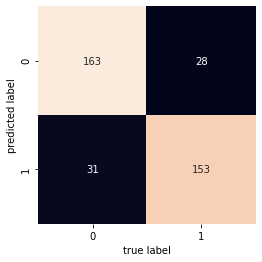

In [48]:
mat = confusion_matrix(test_y, y_pred_log)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [49]:
clf_lgr = CalibratedClassifierCV(logreg, cv=3) 
clf_lgr.fit(train_X, train_y)
y_proba_lgr = clf_lgr.predict_proba(test_X)
y_proba_lgr = pd.DataFrame(y_proba_lgr)
y_proba_lgr.head()
#y_proba_lgr['LGR PREDICTION'] = np.where(y_proba_lgr[0] >= 0.5, 0, 1)

,0,1
0,0.663913,0.336087
1,0.996222,0.003778
2,0.727459,0.272541
3,0.728533,0.271467
4,0.706402,0.293598


## Artificial Neural Network

Importing packages and building new classifer with grid search


In [30]:
'''
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
'''

'\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom keras.models import Sequential\nfrom keras.layers import Dense\n'

In [31]:
'''
# Building our Neural Network with empty optimizer, batch size, and epochs
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
'''

"\n# Building our Neural Network with empty optimizer, batch size, and epochs\ndef build_classifier(optimizer):\n    classifier = Sequential()\n    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))\n    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))\n    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))\n    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))\n    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))\n    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])\n    return classifier\nclassifier = KerasClassifier(build_fn = build_classifier)\n"

In [32]:
'''
# Parameters for batch size, epochs, and optimizer functions
parameters = {'batch_size': [8, 16, 32, 64],
              'epochs': [50, 100, 200],
              'optimizer': ['adam', 'rmsprop']
'''

"\n# Parameters for batch size, epochs, and optimizer functions\nparameters = {'batch_size': [8, 16, 32, 64],\n              'epochs': [50, 100, 200],\n              'optimizer': ['adam', 'rmsprop']\n"

In [ ]:
'''
# Setting up Grid Search
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(train_X, train_y)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
'''

In [ ]:
'''
# Getting our best parameters
best_parameters
'''

Import the necessary libraries to build our neural network.

In [71]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
import random 

# Initialising the ANN
classifier = Sequential()

In [72]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the third hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the fourth hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [73]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
# Fitting the ANN to the Training set
classifier.fit(train_X, train_y, batch_size = 64, epochs = 200)
# Predicting the Test set results
y_pred_ann = classifier.predict(test_X)
y_pred_ann = (y_pred_ann > 0.5)

Epoch 1/200
24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5083
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5043
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5043
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5043
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6271
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.7932
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.7972
Epoch 8/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.8039
Epoch 9/200
24/24 [==============================] - 0s 5ms/step - loss: 0.5444 - accuracy: 0.8099
Epoch 10/200
24/24 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.8139
Epoch 11/

24/24 [==============================] - 0s 4ms/step - loss: 0.2644 - accuracy: 0.8933
Epoch 84/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.8973
Epoch 85/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2641 - accuracy: 0.8986
Epoch 86/200
24/24 [==============================] - 0s 4ms/step - loss: 0.2627 - accuracy: 0.8953
Epoch 87/200
24/24 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.8986
Epoch 88/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2620 - accuracy: 0.8959
Epoch 89/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.8979
Epoch 90/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.8993
Epoch 91/200
24/24 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.8979
Epoch 92/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2595 - accuracy: 0.8973
Epoch 93/200


In [75]:
from sklearn.metrics import confusion_matrix
# Making the Confusion Matrix
cm = confusion_matrix(test_y, y_pred_ann)
# Computing Accuracy, Precision and Recall
print("ANN - Accuracy on the test set: ", accuracy_score(test_y, y_pred_ann))
print("ANN - Precision: ", precision_score(test_y, y_pred_ann))
print("ANN - Recall: ", recall_score(test_y, y_pred_ann))

ANN - Accuracy on the test set:  0.8533333333333334
ANN - Precision:  0.8620689655172413
ANN - Recall:  0.8287292817679558


Text(401.25000000000006, 0.5, 'predicted label')

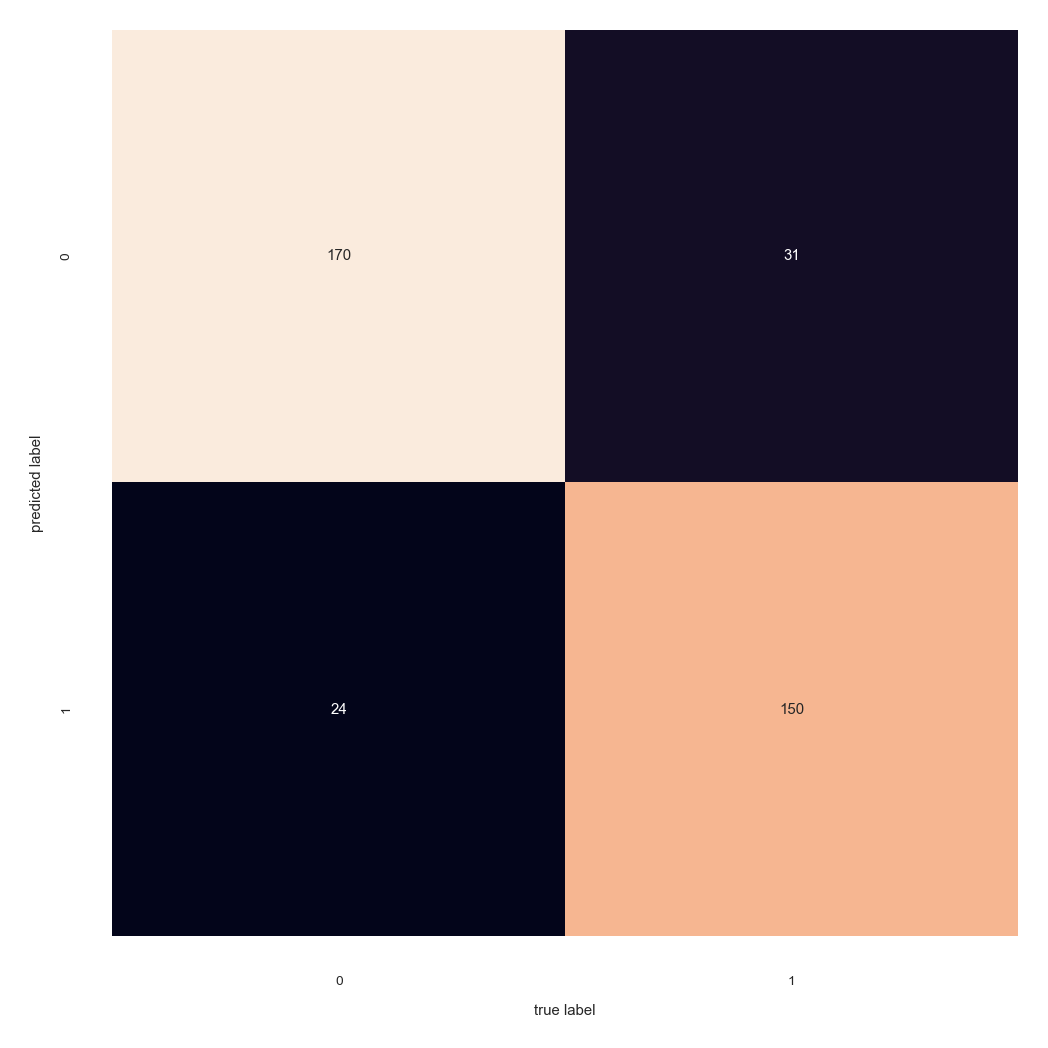

In [76]:
mat = confusion_matrix(test_y, y_pred_ann)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')